## Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## DL Libraries 

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

## Handling outlier is not mandatory but the score will increase slightly

## Data normalisation is must in DL problems

In [ ]:
## Normalise it
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler = scaler.fit_transform(x)

In [ ]:
# spliing data into x and y 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=105)

## Model building 

In [ ]:
model=Sequential()
model.add(Dense(units=16,activation='relu'))  ## Hidden layer
model.add(Dense(units=16,activation='relu'))  ## Hidden layer
model.add(Dense(units=1,activation='linear')) ##Output layer 

## activation = 'linear' - regression 
## activation = 'Sigmoid' - Classification
## activation ='tanh' - RNN

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuarcy'])
## loss ='mean_squared_error' - Regression

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5000)


## Early Stopping 

In [5]:
from keras.callbacks import EarlyStopping
cb = EarlyStopping(monitor='val_loss',min_delta=0.001,patience=40,verbose=1,mode='auto')

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5000,callbacks=cb)

## prediction and checking

In [ ]:
y_pred = model.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

### dropout , batch Normalsation , Regularisation -- All are used to handle overfitting problem

In [6]:
from keras.layers import BatchNormalization,Dropout

In [ ]:
model.add(Dense(units=128,input_dim=2,activation='relu',kernel_regularizer=keras.regularizers.l2(0.2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
## Dropout(0.25) means 25% of nodes are dropped 

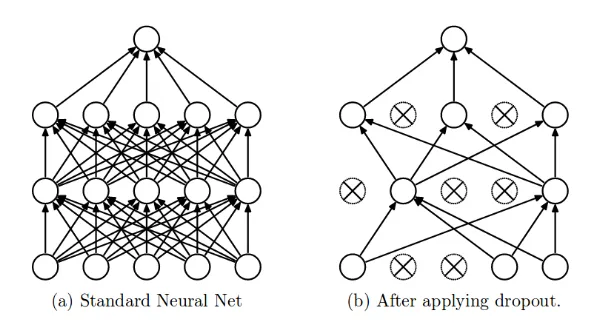

## Weight Initialisation

In [ ]:
model.add(Dense(128,activation='relu',kernel_initializer='glorot_uniform',kernal_regularizer=keras.regularizers.l2(0.01)))

## Optimization

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.01))

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=300,batch_size=32)

## Dividing all dataset into batchsizes eg: dataset-1000rows,batchsize=10, len(batchsize)=100,
## 1 epochs = forward(training all batches one by one) and backward propagation(getting its weights update)